For this assignment you will be implementing your own verision of the perceptron algorithm.  Similar to the Naive Bayes assignment your Percptron class should be built to be compatible with the sklearn framework.  You can use the sklearn library and other python libraries to help with your implementation but you must implement the actual percpetron algorithm using your own code.

In [1]:
# import required modules
import pandas as pd
from sklearn import preprocessing
import numpy as np

** FOR FUTURE REFERENCE: YOU MUST, MUST FOLLOW THE TEMPLATE FOR WHAT NEEDS TO BE IN THE FIT AND PREDICT METHODS AT:

https://scikit-learn.org/stable/developers/develop.html

In [2]:
#TODO: put your perceptron implemenation here

#initial imports that you may find useful
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
from sklearn.utils.multiclass import unique_labels

class custom_perceptron(BaseEstimator, ClassifierMixin):
    def __init__(self, alpha=0.1, epochs=1):
        self.alpha = alpha
        self.epochs = epochs
                 
    def predict(self, X):
        def sigmoid(x):
            return 1 / (1 + np.exp(-x))

        # Check if fit has been called
        check_is_fitted(self)
        
        # Input validation
        X = check_array(X)

        y_hat = np.zeros(len(X))

        for i, row in enumerate(X):                      # Iterate through both X and y together. i is the counter, row is X[i]
            # print(f"predict.enumerate.row: {row}")
            a = sigmoid(np.sum(np.dot(weights,row)))
            # print(f"a: {a} from sigmoid(sum({weights} product {row}))")

            if a >= 0.5:
                # print(f"Class: 1")
                y_hat[i] = 1
            else:
                # print(f"Class: -1")
                y_hat[i] = -1
        
        return y_hat
    
    def train_weights(self, X, y, y_predicted, weights, alpha):
        X_rows, X_columns = X.shape
        weights_update = np.zeros((X_columns))

        for i, row in enumerate(zip(y, y_predicted, X)):
            if row[0] != int(row[1]):
                # Update the weights for each misclassified example
                weights_update += alpha * row[2] * (row[0] - row[1])

        # Apply the accumulated weight updates
        weights += weights_update
        return weights
        
    def fit(self, X, y):

        # STEP 0: Check the parameters
        # Check that X and y have correct shape
        X, y = check_X_y(X, y)

        # Store the classes seen during fit
        self.classes_ = unique_labels(y)
        
        # STEP 1: Initialize the weights of the parameters
        X_rows, X_columns = X.shape
        # print(f"X shape: {X_rows}, {X_columns}")
        global weights
        weights = np.random.randn(X_columns) # Create an array with the number of parameters as X with the random numbers normally distributed (fewer outliers)
        # print(f"Initial random weights: {weights}")

        # STEP 2: Apply the weights to the Nth instance
        
        epoch = 1
        while epoch <= self.epochs:
            # print(f"\n\nEpoch: {epoch}")
            y_hat = np.zeros(len(X))
            y_hat = custom_perceptron.predict(self, X)
            # print(f"len(X): {len(X)} len(y): {len(y)} len(y_hat): {len(y_hat)}")
            # print(f"y_hat: {y_hat}")

            # for i, row in enumerate(zip(y, y_hat)):                    # Iterate through both X and y together. i is the counter, row is X[i]
            weights = self.train_weights(X, y, y_hat, weights, self.alpha)
            epoch += 1
        
        return self
            
    def classes_(self):
        if self.estimator:
            return self.estimator.classes_
        

In [3]:
import numpy as np

# Create some sample data and labels
X = np.array([[1, 2], [3, 4], [5, 6], [7, 8]])
y = np.array([1, 1, -1, -1])

# Create and train a perceptron model
perceptron = custom_perceptron(alpha=0.1, epochs=1)
perceptron.fit(X, y)

# Use the predict method to make predictions on the same data
predictions = perceptron.predict(X)
print(predictions)

[1. 1. 1. 1.]


Split the diabetes data into and 80/20 train/test split.


In [4]:
#TODO: split the diabetes data into training/test data

df = pd.read_csv('Datasets for Assignment 4/diabetes.csv')
X = df.drop(columns='class')
y = df['class']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

Using the diabetes training data with k-fold cross-validation (you choose the value for k) plot your perceptron's cross-validation accuracy and MCC as a function of the number of training epochs.  Use a learning rate of 0.10.

Note to Dr. Feuz, I think the goal here is to illustrate the importance of scaling the data so I'm intentially NOT scaling the training data although I generally would.

In [8]:
#TODO: k-fold cross validation with a learning rate of 0.10

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import matthews_corrcoef, accuracy_score

epoch_range = [1, 5, 10, 100,  1000]
accuracy_scores = []
mcc_scores = []

for i in epoch_range:
    # Create a new perceptron instance for each epoch
    clf = custom_perceptron(alpha=0.10, epochs=i)

    # Create the pipeline
    pipe = make_pipeline(StandardScaler(),clf)

    # Perform cross-validation using the pipeline
    cv = KFold(n_splits=5, shuffle=True)
    accuracy = cross_val_score(pipe, X_train, y_train, cv=cv, scoring='accuracy')
    mcc = cross_val_score(pipe, X_train, y_train, cv=cv, scoring='matthews_corrcoef')

    # Append the scores to the respective lists
    accuracy_scores.append(accuracy.mean())
    mcc_scores.append(mcc.mean())


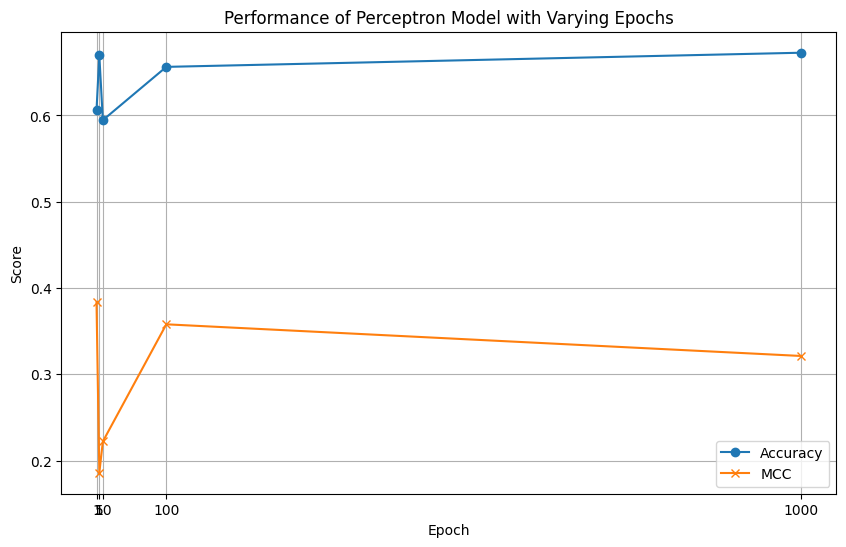

In [9]:
import matplotlib.pyplot as plt

# Configure the plot
plt.figure(figsize=(10, 6))

# Plot accuracy scores
plt.plot(epoch_range, accuracy_scores, label='Accuracy', marker='o')

# Plot MCC scores
plt.plot(epoch_range, mcc_scores, label='MCC', marker='x')

# Add labels and title
plt.xlabel('Epoch')
plt.ylabel('Score')
plt.title('Performance of Perceptron Model with Varying Epochs')

# Add legend
plt.legend()

# Show the plot
plt.grid(True)
plt.xticks(epoch_range)
plt.yticks()
plt.show()

Choose a normalization/standardization strategy to apply to the diabetes training data. Using k-fold cross validation and plot the cross validation accuracy and MCC as a function of the number of training epochs.  Repeat for learning rates of 0.90, 0.50, 0.10, 0.01, and 0.0001.

In [ ]:
#TODO: k-fold cross validation on normalized/standardized data

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import matthews_corrcoef, accuracy_score

epoch_range = [1, 5, 10]
learning_rates_range = [0.90, 0.50, 0.10, 0.01, 0.0001]
accuracy_scores = []
mcc_scores = []

for i in learning_rates_range:
    # Create a new perceptron instance for each epoch
    clf = custom_perceptron(alpha=i, epochs=i)

    # Create the pipeline
    pipe = make_pipeline(StandardScaler(), clf)

    # Perform cross-validation using the pipeline
    cv = KFold(n_splits=5, shuffle=True)
    accuracy = cross_val_score(pipe, X_train, y_train, cv=cv, scoring='accuracy')
    mcc = cross_val_score(pipe, X_train, y_train, cv=cv, scoring='matthews_corrcoef')

    # Append the scores to the respective lists
    accuracy_scores.append(accuracy.mean())
    mcc_scores.append(mcc.mean())


In [ ]:
import matplotlib.pyplot as plt

# Configure the plot
plt.figure(figsize=(10, 6))

# Plot accuracy scores
plt.plot(learning_rates_range, accuracy_scores, label='Accuracy', marker='o')

# Plot MCC scores
plt.plot(learning_rates_range, mcc_scores, label='MCC', marker='x')

# Add labels and title
plt.xlabel('Learning Rates (aka Alpha)')
plt.ylabel('Score')
plt.title('Performance of Perceptron Model with Varying Learning Rates against MinMaxScaler')

# Add legend
plt.legend()

# Show the plot
plt.grid(True)
plt.xticks(learning_rates_range)
plt.yticks(np.arange(min(accuracy_scores), max(accuracy_scores) + 0.1, step=0.1))
plt.show()

In [ ]:
#TODO: k-fold cross validation on normalized/standardized data

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import matthews_corrcoef, accuracy_score

epoch_range = [1, 5, 10]
learning_rates_range = [0.90, 0.50, 0.10, 0.01, 0.0001]
accuracy_scores = []
mcc_scores = []

for i in learning_rates_range:
    # Create a new perceptron instance for each epoch
    clf = custom_perceptron(alpha=i, epochs=i)

    # Create the pipeline
    pipe = make_pipeline(Normalizer(), clf)

    # Perform cross-validation using the pipeline
    cv = KFold(n_splits=5, shuffle=True)
    accuracy = cross_val_score(pipe, X_train, y_train, cv=cv, scoring='accuracy')
    mcc = cross_val_score(pipe, X_train, y_train, cv=cv, scoring='matthews_corrcoef')

    # Append the scores to the respective lists
    accuracy_scores.append(accuracy.mean())
    mcc_scores.append(mcc.mean())


In [ ]:
import matplotlib.pyplot as plt

# Configure the plot
plt.figure(figsize=(10, 6))

# Plot accuracy scores
plt.plot(learning_rates_range, accuracy_scores, label='Accuracy', marker='o')

# Plot MCC scores
plt.plot(learning_rates_range, mcc_scores, label='MCC', marker='x')

# Add labels and title
plt.xlabel('Learning Rates (aka Alpha)')
plt.ylabel('Score')
plt.title('Performance of Perceptron Model with Varying Learning Rates against Normalizer Scaler')

# Add legend
plt.legend()

# Show the plot
plt.grid(True)
plt.xticks(learning_rates_range)
plt.yticks(np.arange(min(accuracy_scores), max(accuracy_scores) + 0.1, step=0.1))
plt.show()

How does the normalization/standardization affect the accuracy and MCC scores and number of training epochs?

Answer in this text box

On the scaled data, for each learning rate, how many training epochs are needed to acheive maximize the accuracy and MCC scores?

Answer in this text box

Is there a correlation between learning rates and the number of training epochs needed to acheive the optimal results?  If so, what is the correlation?  If not, why not?

Answer in this text box

Helpful resources:
* https://towardsdatascience.com/how-to-build-a-custom-estimator-for-scikit-learn-fddc0cb9e16e
* Trying to handle the scoring error: https://ubc-cs.github.io/cpsc330-2023W1/lectures/class_demos/05-06_class-demo.html